In [1028]:
import pandas as pd # Для работы с данными
from scipy import stats # Статистика
import os
import matplotlib.pyplot as plt # Для визуализации (вариант 1)
import seaborn as sns # Для визуализации (вариант 2)
import numpy as np
from matplotlib import pyplot as plt
from phik import resources, phik_matrix # Для построения нелинейной корреляции
from sklearn import preprocessing

In [1029]:
absolute_path = os.path.abspath("AI_task_1.csv")
print(absolute_path)

df = pd.read_csv(absolute_path, delimiter=',', decimal='.')
df

c:\Users\user\Desktop\PythonVSC\AI_task_1.csv


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,-7.4,0.700,0.00,-,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,-,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,-,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.9949,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,NaN,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [1030]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar           object
chlorides               float64
free_sulfur_dioxide      object
total_sulfur_dioxide     object
density                  object
pH                       object
sulphates               float64
alcohol                  object
quality                  object
dtype: object

In [1031]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    
    if df[column].dtype != 'float64':
        df[column] = df[column].astype(np.float64)

df.dtypes
           


fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object

In [1032]:
print('Вывод_1: изначальный датафрейм содержал ошибки в типах данных, которые были исправлены.')

Вывод_1: изначальный датафрейм содержал ошибки в типах данных, которые были исправлены.


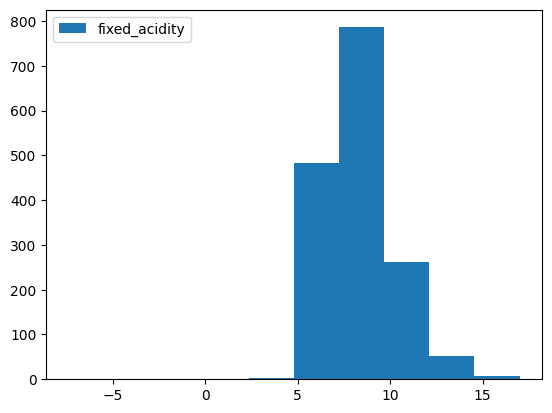

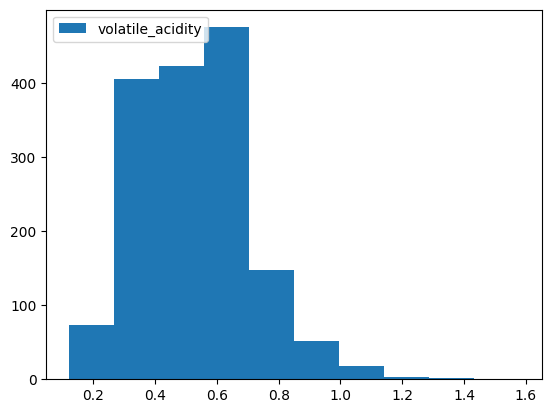

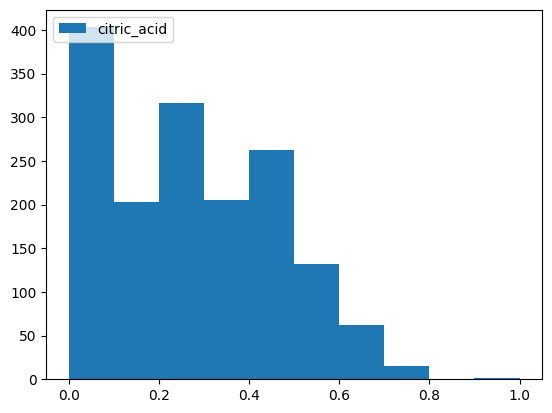

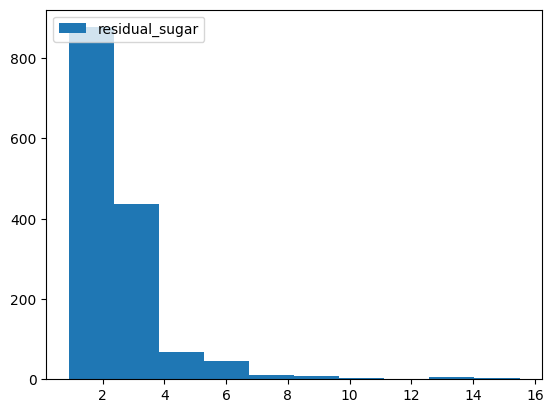

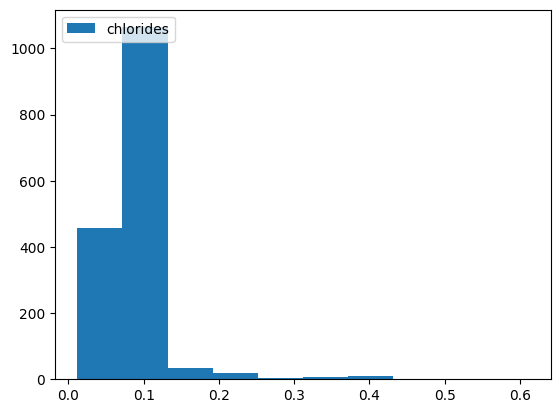

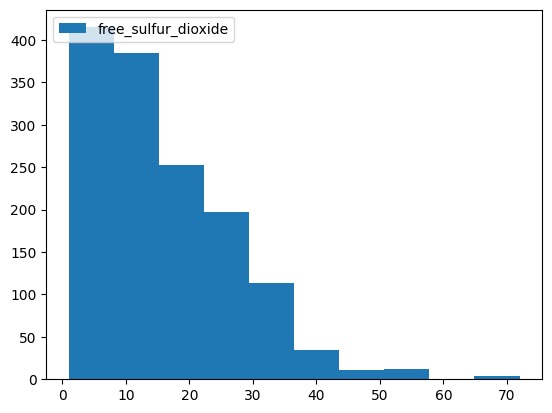

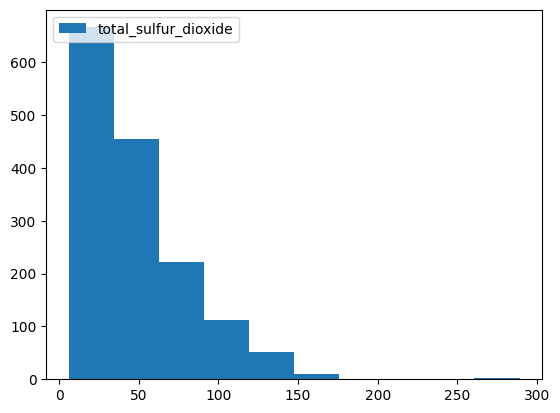

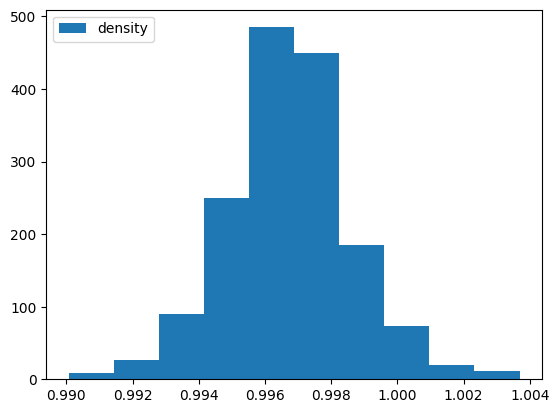

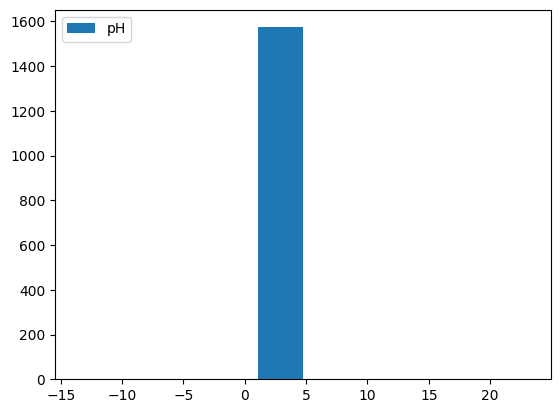

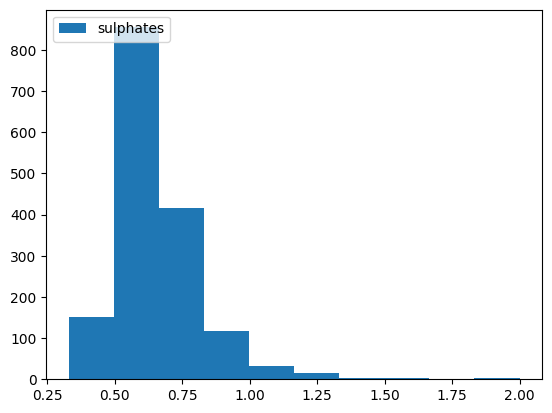

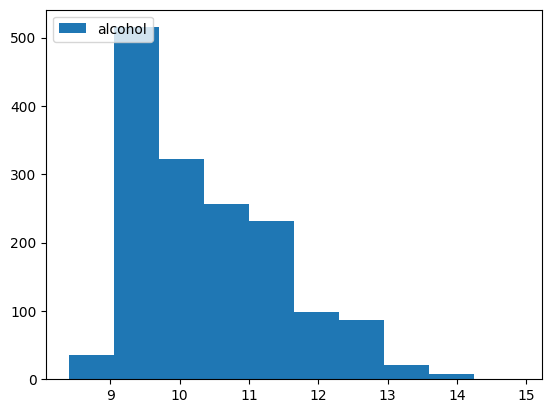

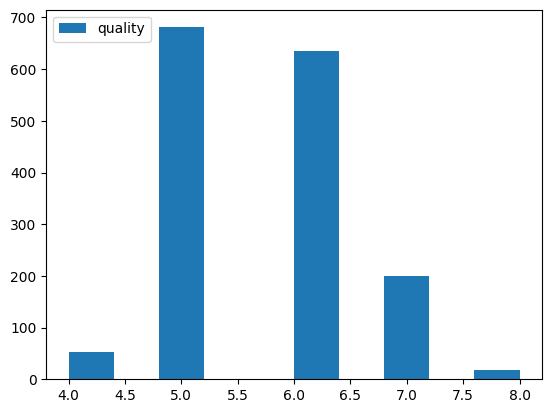

In [1033]:
for column in df.columns:
    plt.hist(df[column])
    plt.legend({column}, loc='upper left')
    plt.show()

In [1034]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [1035]:
print('Вывод_2: все выбросы заменены ранее на значения NaN, в наборе данных они могли появиться из-за ошибки ввода.')

Вывод_2: все выбросы заменены ранее на значения NaN, в наборе данных они могли появиться из-за ошибки ввода.


In [1036]:
print('всего строк: '+str(len(df)))
print('всего значений: '+str(df.size))
print('всего пропусков: '+ str(df.isnull().sum().sum()))
print('суммарная доля пропусков от всех значений: ' + str(df.isnull().sum().sum() / df.size))
print('пропусков на столбец:')
print(df.isnull().sum())
print('доля пропусков на столбец:')
print(df.isnull().mean())

всего строк: 1599
всего значений: 19188
всего пропусков: 463
суммарная доля пропусков от всех значений: 0.02412966437356681
пропусков на столбец:
fixed_acidity             7
volatile_acidity          0
citric_acid               0
residual_sugar          144
chlorides                 0
free_sulfur_dioxide     175
total_sulfur_dioxide     80
density                   1
pH                       21
sulphates                 0
alcohol                  22
quality                  13
dtype: int64
доля пропусков на столбец:
fixed_acidity           0.004378
volatile_acidity        0.000000
citric_acid             0.000000
residual_sugar          0.090056
chlorides               0.000000
free_sulfur_dioxide     0.109443
total_sulfur_dioxide    0.050031
density                 0.000625
pH                      0.013133
sulphates               0.000000
alcohol                 0.013759
quality                 0.008130
dtype: float64


In [1037]:
df = df.dropna()
df


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5.0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6.0
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0


In [1038]:
print('Вывод_3: кол-во пропусков увеличилось, ввиду того, что до этого все выбросы были заменены на значения NaN, в качестве решения было выбрано удаление строк с пропусками.')

Вывод_3: кол-во пропусков увеличилось, ввиду того, что до этого все выбросы были заменены на значения NaN, в качестве решения было выбрано удаление строк с пропусками.


In [1039]:
print('кол-во дубликатов строк:' + str(df.duplicated().sum()))
x = 0
for column in df.columns:
    print('различные дубликаты в '+str(column)+' '+str(df[column].duplicated().sum()))
    x+=df[column].duplicated().sum()
print('кол-во различных дубликатов всего: ' + str(x))
print('число строк: '+str(len(df)))
print('число значений: '+str(df.size))
print('процент дубликатов от всех значений: ' + str(x/df.size))
    

кол-во дубликатов строк:177
различные дубликаты в fixed_acidity 1091
различные дубликаты в volatile_acidity 1051
различные дубликаты в citric_acid 1103
различные дубликаты в residual_sugar 1102
различные дубликаты в chlorides 1054
различные дубликаты в free_sulfur_dioxide 1129
различные дубликаты в total_sulfur_dioxide 1045
различные дубликаты в density 810
различные дубликаты в pH 1094
различные дубликаты в sulphates 1096
различные дубликаты в alcohol 1125
различные дубликаты в quality 1178
кол-во различных дубликатов всего: 12878
число строк: 1183
число значений: 14196
процент дубликатов от всех значений: 0.907156945618484


In [1040]:
print('Вывод_4: кол-во дубликатов в массиве хим. значений значительно ввиду специфики этой темы, удалять их нет смысла - как пример, могут сущестовать в реальности два разных, или даже два одинаковых, раствора одной концентарции или с одним значением pH, то есть эти значения не уникальны.')

Вывод_4: кол-во дубликатов в массиве хим. значений значительно ввиду специфики этой темы, удалять их нет смысла - как пример, могут сущестовать в реальности два разных, или даже два одинаковых, раствора одной концентарции или с одним значением pH, то есть эти значения не уникальны.


<Axes: >

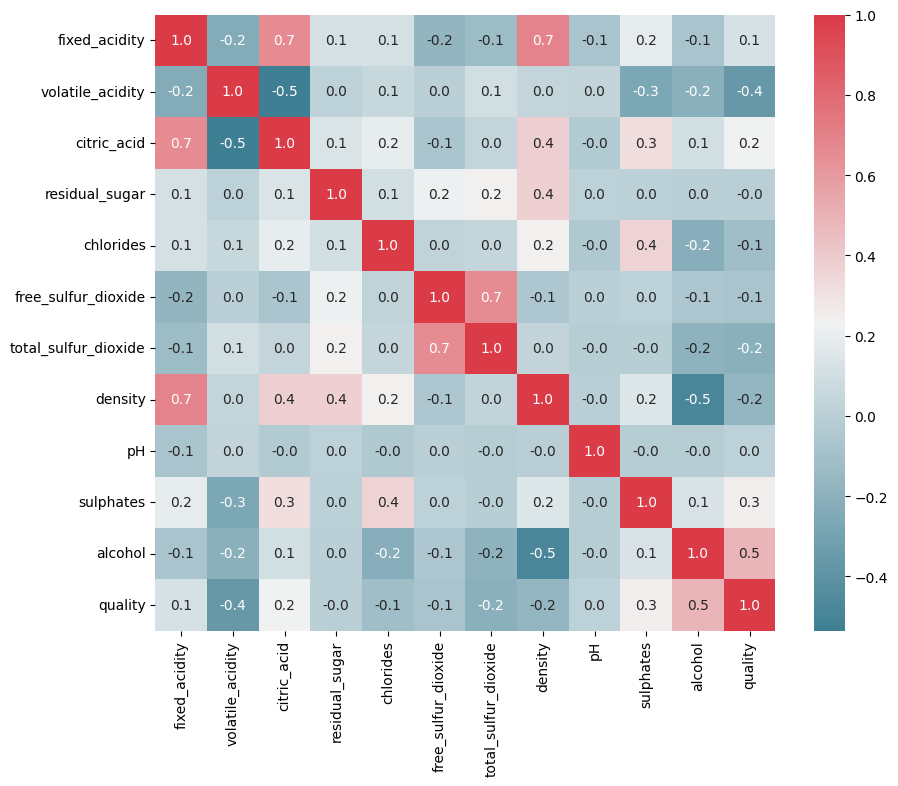

In [1041]:
corr = df.corr()

f, ax = plt.subplots(figsize=(10, 8)) # создание графика и определение его размеров

cmap = sns.diverging_palette(220, 10, as_cmap=True) # создание палитры для более визуально-понятного отображения корреляций

sns.heatmap(
    corr, # матрица корреляций Пирсона
    cmap=cmap, # палитра
    annot=True, # вывод коэффициентов корреляции
    fmt=".1f" # число знаков после запятой
)

In [1042]:
print('Вывод_5: коэффициент корреляции Пирсона является мерой линейной зависимости между двумя переменными. Значение коэффициента Пирсона варьируется от -1 до 1, где значения, близкие к 1 или -1, указывают на сильную линейную зависимость, а значения, близкие к 0, указывают на слабую или отсутствующую зависимость. К недостаткам линейной корреляции относятся: чувствительность к выбросам, она не указывает на причинно-следственную связь, невозможность выявить нелинейную зависимость между переменными.')

Вывод_5: коэффициент корреляции Пирсона является мерой линейной зависимости между двумя переменными. Значение коэффициента Пирсона варьируется от -1 до 1, где значения, близкие к 1 или -1, указывают на сильную линейную зависимость, а значения, близкие к 0, указывают на слабую или отсутствующую зависимость. К недостаткам линейной корреляции относятся: чувствительность к выбросам, она не указывает на причинно-следственную связь, невозможность выявить нелинейную зависимость между переменными.


interval columns not set, guessing: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


<Axes: >

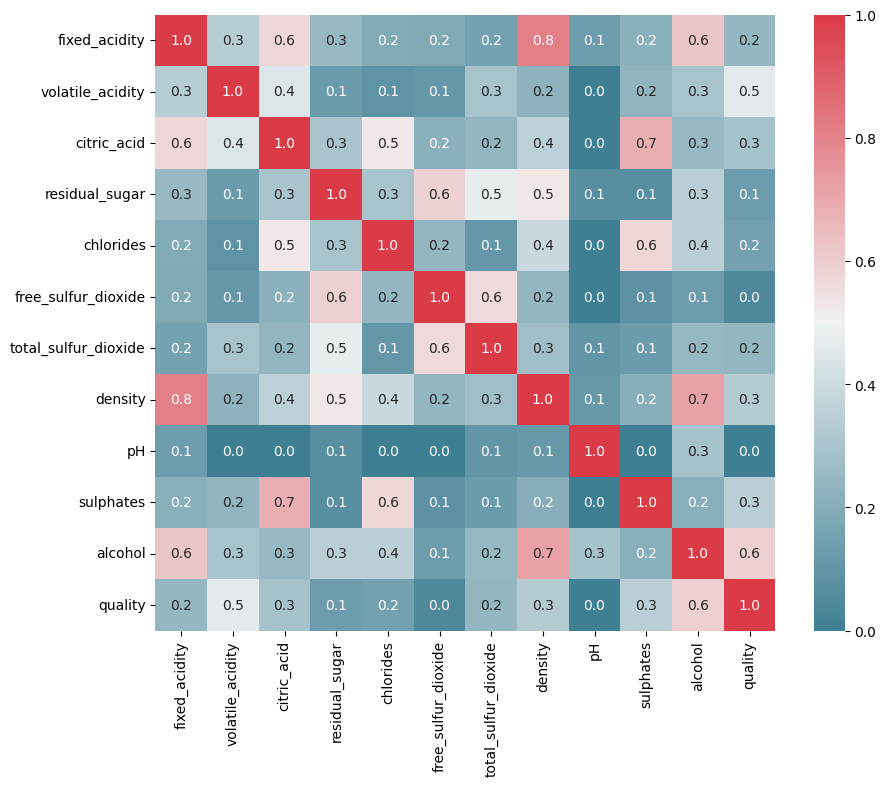

In [1043]:
phik_corr_matrix = df.phik_matrix() 


f, ax = plt.subplots(figsize=(10, 8)) # создание графика и определение его размеров

cmap = sns.diverging_palette(220, 10, as_cmap=True) # создание палитры для более визуально-понятного отображения корреляций

sns.heatmap(
    phik_corr_matrix, # матрица корреляций фика
    cmap=cmap, # палитра
    annot=True, # вывод коэффициентов корреляции
    fmt=".1f" # число знаков после запятой
)

In [1044]:
print('Вывод_6: метод Фика, в отличие от Пирсона, фиксирует нелинейные зависимости, а также включает в расчет категориальные признаки(переменные, которые представляют категории или метки, а не числовые значения). Оценка корреляции здесь варьируется от 0 до 1, а не от -1 до 1. Он возвращается к коэффициенту корреляции Пирсона в случае двумерного нормального распределения входных данных. ')

Вывод_6: метод Фика, в отличие от Пирсона, фиксирует нелинейные зависимости, а также включает в расчет категориальные признаки(переменные, которые представляют категории или метки, а не числовые значения). Оценка корреляции здесь варьируется от 0 до 1, а не от -1 до 1. Он возвращается к коэффициенту корреляции Пирсона в случае двумерного нормального распределения входных данных. 


In [1045]:
print('Вывод_7: 1 - да, существует неполная положительная корреляция между alcohol и quality'+'\n'+'         2 - нет, корреляция между residual sugar и quality практически отсутствует')

Вывод_7: 1 - да, существует неполная положительная корреляция между alcohol и quality
         2 - нет, корреляция между residual sugar и quality практически отсутствует


In [1046]:
median_alcohol = df['alcohol'].median()
high_alcohol = df[df['alcohol'] > median_alcohol]['quality']
low_alcohol = df[df['alcohol'] <= median_alcohol]['quality']

statistic_alcohol, pvalue_alcohol = stats.ttest_ind(a=high_alcohol, b=low_alcohol) 

median_sugar = df['residual_sugar'].median()
high_sugar = df[df['residual_sugar'] > median_sugar]['quality']
low_sugar = df[df['residual_sugar'] <= median_sugar]['quality']

statistic_sugar, pvalue_sugar = stats.ttest_ind(a=high_sugar, b=low_sugar) 

print('Ttest_indResult(statistic_alcohol = '+str(statistic_alcohol)+', pvalue_alcohol = '+str(pvalue_alcohol))
print('\n'+'Ttest_indResult(statistic_sugar = '+str(statistic_sugar)+', pvalue_sugar = '+str(pvalue_sugar)+'\n')

alpha = 0.05 
if pvalue_alcohol < alpha:
    print("pvalue_alcohol Отвергаем нулевую гипотезу, присутствует разница в качестве вина")
else:
    print("pvalue_alcohol Не отвергаем нулевую гипотезу, разница в качестве вина отсутствует")
    
if pvalue_sugar < alpha:
    print("pvalue_sugar Отвергаем нулевую гипотезу, присутствует разница в качестве вина")
else:
    print("pvalue_sugar Не отвергаем нулевую гипотезу, разница в качестве вина отсутствует")


Ttest_indResult(statistic_alcohol = 15.965505171453971, pvalue_alcohol = 4.1842442063990136e-52

Ttest_indResult(statistic_sugar = 1.2020685740655017, pvalue_sugar = 0.2295779307116283

pvalue_alcohol Отвергаем нулевую гипотезу, присутствует разница в качестве вина
pvalue_sugar Не отвергаем нулевую гипотезу, разница в качестве вина отсутствует


In [1047]:
print('Вывод_8: качество вина различается для вин с низким и высоким содержанием алкоголя. У вин с разным содержанием сахара, разница в качестве отсутстсвует/не значительна')

Вывод_8: качество вина различается для вин с низким и высоким содержанием алкоголя. У вин с разным содержанием сахара, разница в качестве отсутстсвует/не значительна


In [1048]:
print('Гипотезы: Различается ли качество вина с высоким и низким значением плотности density? Различается ли плотность вина для высоких и низких показателей фиксированной кислотности fixed acidity')
median_density = df['density'].median()
high_density = df[df['density'] > median_density]['quality']
low_density = df[df['density'] <= median_density]['quality']

statistic_density, pvalue_density = stats.ttest_ind(a=high_density, b=low_density) 

median_fixed_acidity = df['fixed_acidity'].median()
high_fixed_acidity = df[df['fixed_acidity'] > median_fixed_acidity]['density']
low_fixed_acidity = df[df['fixed_acidity'] <= median_fixed_acidity]['density']

statistic_fixed_acidity, pvalue_fixed_acidity = stats.ttest_ind(a=high_fixed_acidity, b=low_fixed_acidity) 

print('Ttest_indResult(statistic_density = '+str(statistic_density)+', pvalue_density = '+str(pvalue_density))
print('Ttest_indResult(statistic_fixed_acidity = '+str(statistic_fixed_acidity)+', pvalue_fixed_acidity = '+str(pvalue_fixed_acidity)+'\n')

alpha = 0.05 
if pvalue_density < alpha:
    print("pvalue_density Отвергаем нулевую гипотезу, присутствует разница в качестве вина")
else:
    print("pvalue_density Не отвергаем нулевую гипотезу, разница в качестве вина отсутствует")
    
if pvalue_fixed_acidity < alpha:
    print("pvalue_fixed_acidity Отвергаем нулевую гипотезу, присутствует разница в плотности вина")
else:
    print("pvalue_fixed_acidity Не отвергаем нулевую гипотезу, разница в плотности отсутствует")

Гипотезы: Различается ли качество вина с высоким и низким значением плотности density? Различается ли плотность вина для высоких и низких показателей фиксированной кислотности fixed acidity
Ttest_indResult(statistic_density = -3.951654020543205, pvalue_density = 8.221445500233556e-05
Ttest_indResult(statistic_fixed_acidity = 20.441961569219398, pvalue_fixed_acidity = 9.27609407562771e-80

pvalue_density Отвергаем нулевую гипотезу, присутствует разница в качестве вина
pvalue_fixed_acidity Отвергаем нулевую гипотезу, присутствует разница в плотности вина


In [1049]:
print('Вывод_9: Были проверены две гипотезы: качество вина различается для вин с низкой и высокой плотностью. У вин с разными показателями fixed_acidity присутствует различие в плотности')

Вывод_9: Были проверены две гипотезы: качество вина различается для вин с низкой и высокой плотностью. У вин с разными показателями fixed_acidity присутствует различие в плотности


In [1050]:
print('Показатель pH не является категориальным в абсолютном смысле, показатель качества - является категориальным')

Показатель pH не является категориальным в абсолютном смысле, показатель качества - является категориальным


In [1051]:
from sklearn.preprocessing import OneHotEncoder


onehotencoder = OneHotEncoder()
data_en = onehotencoder.fit_transform(df[['quality']])
pd.DataFrame(data_en.toarray(),
columns=onehotencoder.categories_).head(10)


,4.0,5.0,6.0,7.0,8.0
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0


In [1052]:
df.describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,8.353846,0.527802,0.272570,2.607523,0.086308,16.907861,49.230769,0.996816,3.316221,0.656729,10.406932,5.649197
std,1.780597,0.175126,0.191055,1.514420,0.042901,10.842471,33.622714,0.001927,0.891919,0.161705,1.049095,0.782322
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,7.000000,0.990070,-13.630000,0.330000,8.400000,4.000000
25%,7.100000,0.390000,0.100000,2.000000,0.070000,8.000000,24.000000,0.995630,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.530000,0.260000,2.200000,0.080000,15.000000,42.000000,0.996800,3.300000,0.620000,10.100000,6.000000
75%,9.300000,0.640000,0.420000,2.600000,0.091000,24.000000,65.000000,0.998000,3.400000,0.730000,11.000000,6.000000
max,15.900000,1.240000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,23.120000,2.000000,14.900000,8.000000


In [1053]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5.0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6.0
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0


In [1054]:

min_max_scaler = preprocessing.MinMaxScaler()
df.loc[:, ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']] = min_max_scaler.fit_transform(df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']])

df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1,0.283186,0.678571,0.00,0.116438,0.143573,0.338028,0.212766,0.494126,0.457959,0.209581,0.215385,0.25
2,0.283186,0.571429,0.04,0.095890,0.133556,0.197183,0.166667,0.508811,0.459592,0.191617,0.215385,0.25
5,0.247788,0.482143,0.00,0.061644,0.105175,0.169014,0.117021,0.567548,0.466395,0.137725,0.153846,0.25
6,0.292035,0.428571,0.06,0.047945,0.095159,0.197183,0.184397,0.464758,0.460680,0.077844,0.153846,0.25
7,0.238938,0.473214,0.00,0.020548,0.088481,0.197183,0.049645,0.332599,0.463129,0.083832,0.246154,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,0.070796,0.553571,0.09,0.054795,0.128548,0.211268,0.067376,0.290015,0.470748,0.137725,0.492308,0.50
1592,0.150442,0.348214,0.13,0.095890,0.106845,0.394366,0.117021,0.416300,0.463946,0.251497,0.400000,0.50
1594,0.141593,0.428571,0.08,0.075342,0.130217,0.436620,0.131206,0.354626,0.464762,0.149701,0.323077,0.25
1596,0.150442,0.348214,0.13,0.095890,0.106845,0.394366,0.117021,0.416300,0.463946,0.251497,0.400000,0.50


In [1055]:
print('Вывод_10: да, диапазоны данных различаются. Для масштабирования использовался MinMaxScaler')

Вывод_10: да, диапазоны данных различаются. Для масштабирования использовался MinMaxScaler
